In [12]:
import cmocean as cmo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr

from netCDF4 import Dataset
from xmitgcm import open_mdsdataset
import time


In [3]:
SVB = xr.open_dataset('curtain_SSH_SVB_febTS.nc')
noSVB = xr.open_dataset('curtain_SSH_NoSVB_febTS.nc')

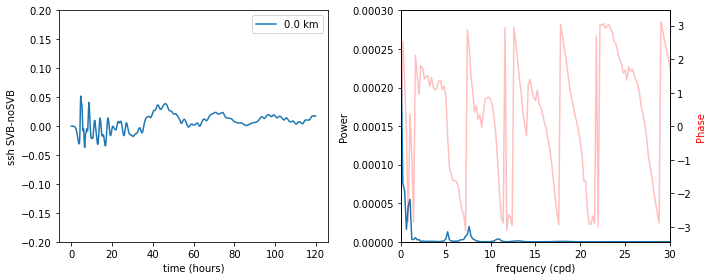

1.299205007569193e-05
5.2
1.9814659830200573e-05
7.6
3.898629392321007e-06
10.8


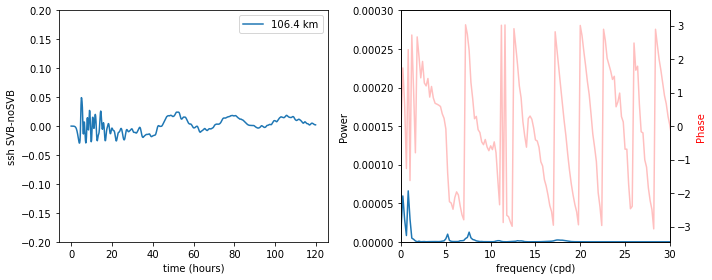

9.900544545687425e-06
5.2
1.2511103308088308e-05
7.6
1.4487032508572104e-06
10.8


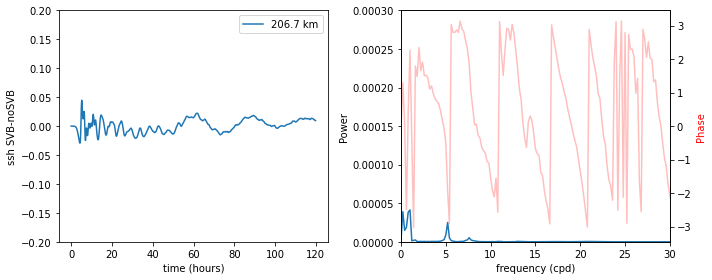

2.5117742867482095e-05
5.2
5.313887030202058e-06
7.6
5.355937103940818e-07
10.8


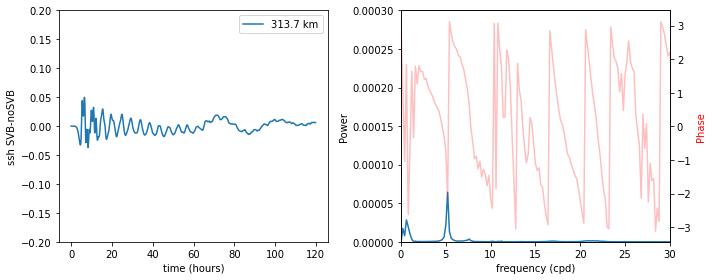

6.421293900143855e-05
5.2
3.565907337578119e-06
7.6
7.973558716013355e-07
11.2


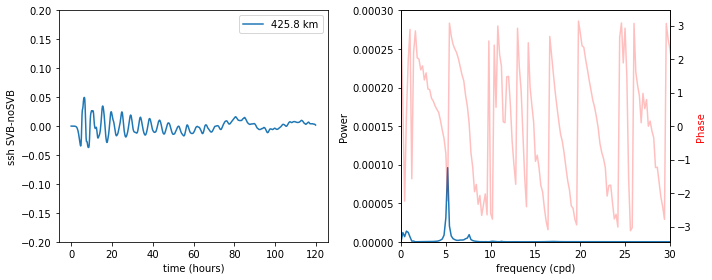

9.60781959998711e-05
5.2
9.267632648997977e-06
7.6
7.289734416711212e-07
10.200000000000001


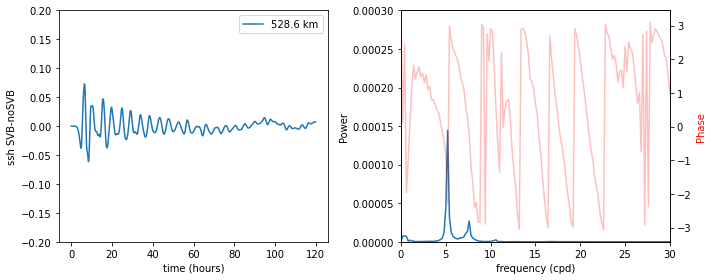

0.0001445227434202071
5.2
2.6881406627720687e-05
7.6
2.4867601571043717e-06
10.6


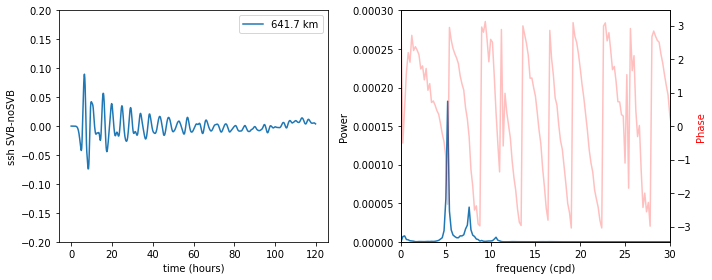

0.0001822198609660713
5.2
4.4956139501313754e-05
7.6
5.919965711161743e-06
10.6


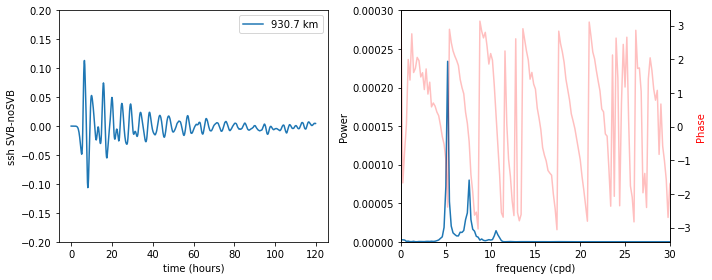

0.00023396009281116735
5.2
8.000156476080727e-05
7.6
1.4390395866836445e-05
10.6


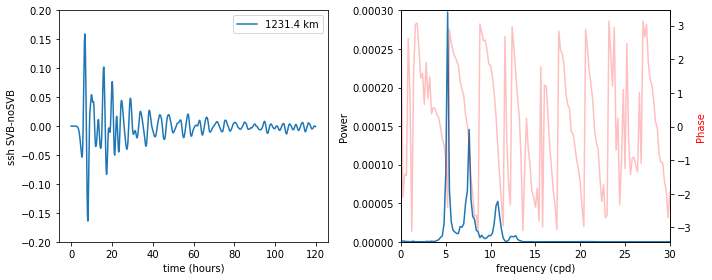

0.00029785475461673684
5.2
0.00014565674414040525
7.6
5.237627492808659e-05
10.8


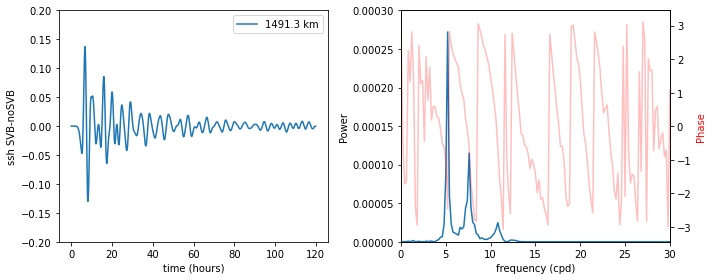

0.0002720433424812169
5.2
0.00011496101819258012
7.6
2.4849891018616784e-05
10.8


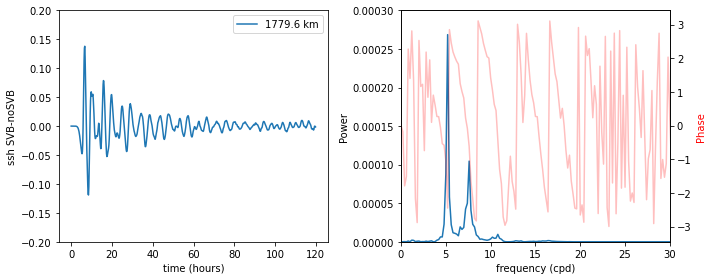

0.0002685756687645538
5.2
0.0001046028034456165
7.6
9.64839562847227e-06
10.8


In [4]:
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100 # in cm
samp_freq = 1/600 # 10 min data
X = SVB.X[:]
indices = [0,50,100,150,200,250,300,350,400,450,500]

# Generate a model signal
t0 = 0
dt = 600
freq = (1./dt)

t = np.linspace( t0, t0+720*dt, 720, endpoint=False )

for ii in indices:
    signal = timeseries[:,ii]

    ## Fourier transform of real valued signal
    signalFFT = np.fft.rfft(signal)

    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    # And now, the graphics -------------------

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(signal), dt)

    plt.figure( figsize=(10, 4) )

    ax1 = plt.subplot( 1, 2, 1 )
    ax1.plot( t/(3600), signal, label='%1.1f km' %X[ii])
    ax1.set_ylabel( 'ssh SVB-noSVB' )
    ax1.set_xlabel( 'time (hours)' )
    ax1.legend()

    ax2 = plt.subplot( 1, 2, 2 )
    ax2.plot( fftFreq*(86400), signalPSD )
    ax2.set_ylabel( 'Power' )
    ax2.set_xlabel( 'frequency (cpd)' )

    ax2b = ax2.twinx()
    ax2b.plot( fftFreq*(86400), signalPhase, alpha=0.25, color='r' )
    ax2b.set_ylabel( 'Phase', color='r' )

    ax2.set_xlim(0,30)
    ax2b.set_xlim(0,30)
    ax2.set_ylim(0,0.0003)
    ax1.set_ylim(-0.20,0.2)
    
    plt.tight_layout()
    
    plt.show()
    print(np.max(signalPSD[20:30])) # find max PSD for peak 1 (these limits shouldn't be hard coded!)
    print(fftFreq[np.argmax(signalPSD[20:30])+20]*86400) # find corresponding frequency
        
    print(np.max(signalPSD[34:45])) # find max PSD for peak 2
    print(fftFreq[np.argmax(signalPSD[34:45])+34]*86400)
        
    print(np.max(signalPSD[47:59])) # find max PSD for peak 3
    print(fftFreq[np.argmax(signalPSD[47:59])+47]*86400)


### With SVB

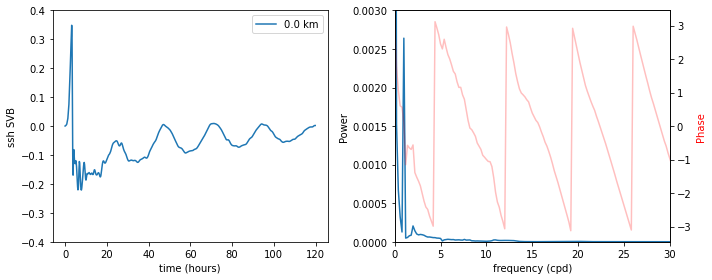

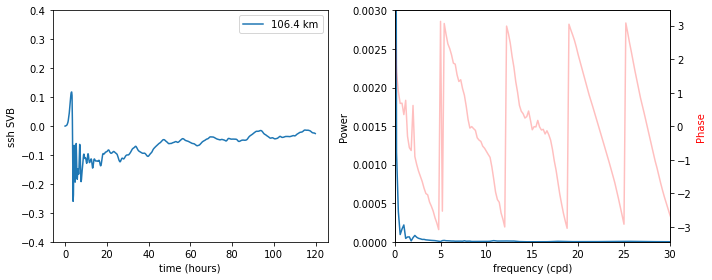

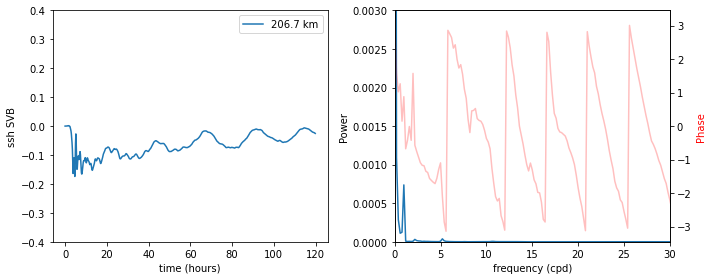

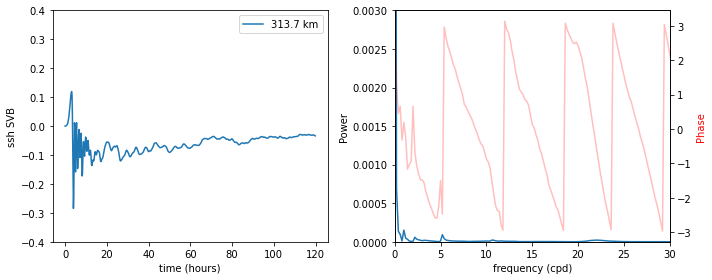

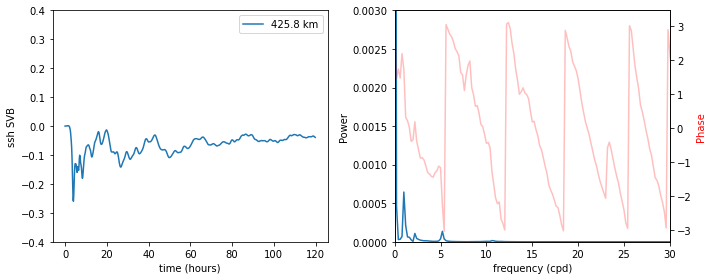

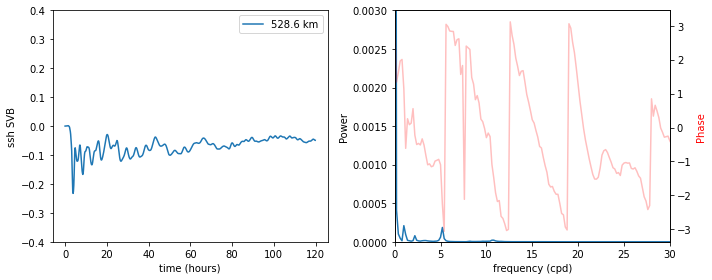

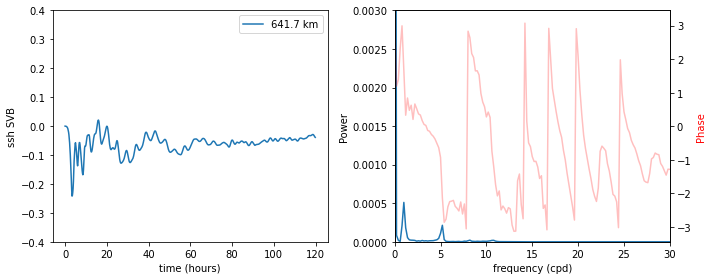

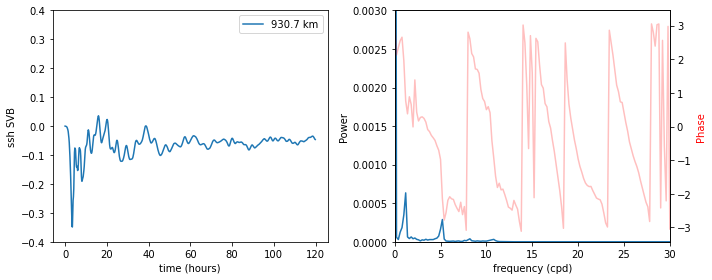

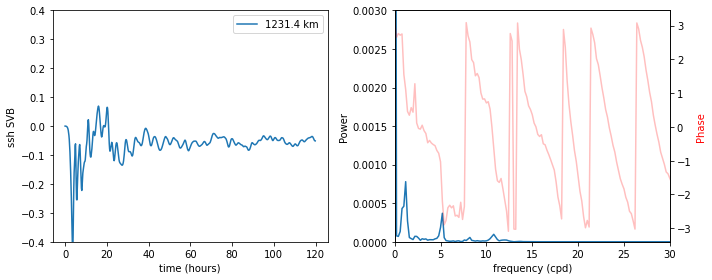

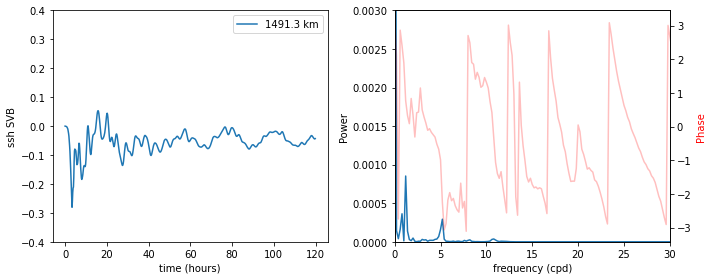

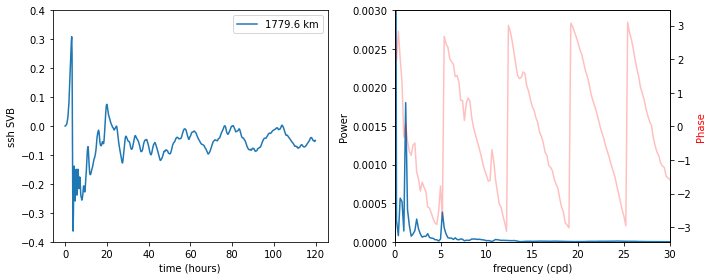

In [5]:
timeseries = (SVB.curtain_data.data)*100 # in cm
samp_freq = 1/600 # 10 min data
X = SVB.X[:]
indices = [0,50,100,150,200,250,300,350,400,450,500]

# Generate a model signal
t0 = 0
dt = 600
freq = (1./dt)

t = np.linspace( t0, t0+720*dt, 720, endpoint=False )

for ii in indices:
    signal = timeseries[:,ii]

    ## Fourier transform of real valued signal
    signalFFT = np.fft.rfft(signal)

    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    # And now, the graphics -------------------

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(signal), dt)

    plt.figure( figsize=(10, 4) )

    ax1 = plt.subplot( 1, 2, 1 )
    ax1.plot( t/(3600), signal, label='%1.1f km' %X[ii])
    ax1.set_ylabel( 'ssh SVB' )
    ax1.set_xlabel( 'time (hours)' )
    ax1.legend()

    ax2 = plt.subplot( 1, 2, 2 )
    ax2.plot( fftFreq*(86400), signalPSD )
    ax2.set_ylabel( 'Power' )
    ax2.set_xlabel( 'frequency (cpd)' )

    ax2b = ax2.twinx()
    ax2b.plot( fftFreq*(86400), signalPhase, alpha=0.25, color='r' )
    ax2b.set_ylabel( 'Phase', color='r' )

    ax2.set_xlim(0,30)
    ax2b.set_xlim(0,30)
    ax2.set_ylim(0,0.003)
    ax1.set_ylim(-0.4,0.4)
    
    plt.tight_layout()

    plt.show()

### No SVB

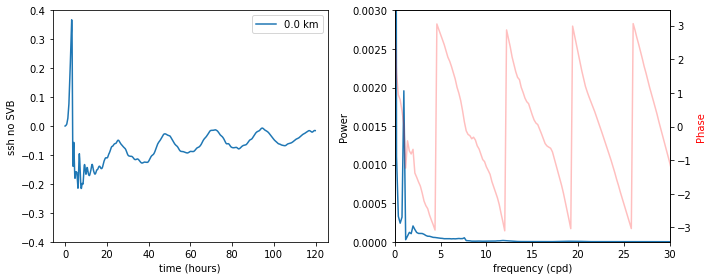

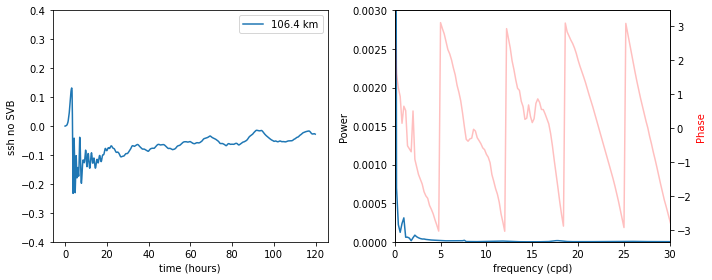

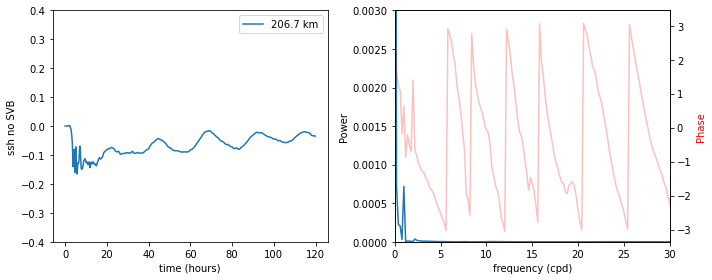

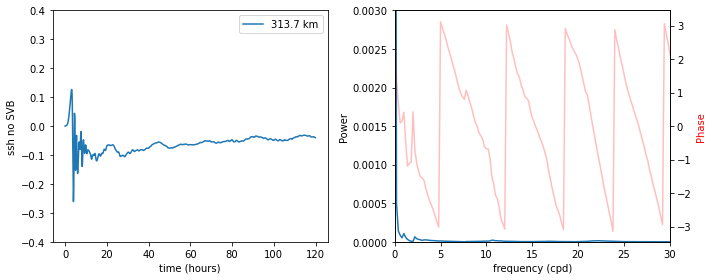

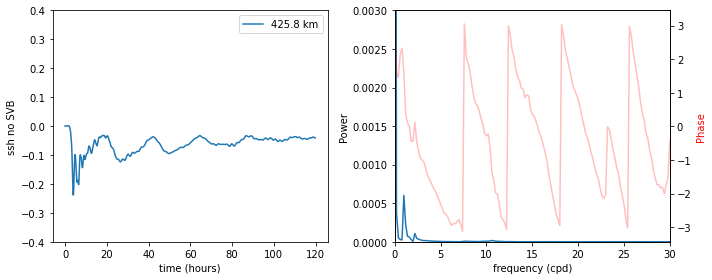

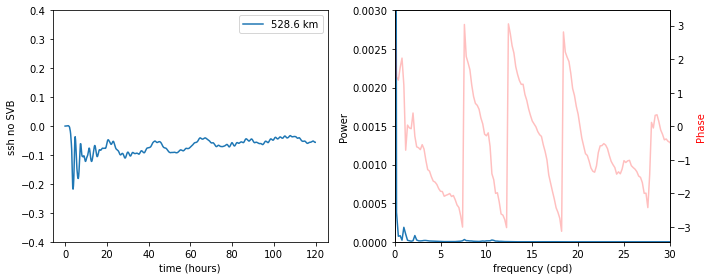

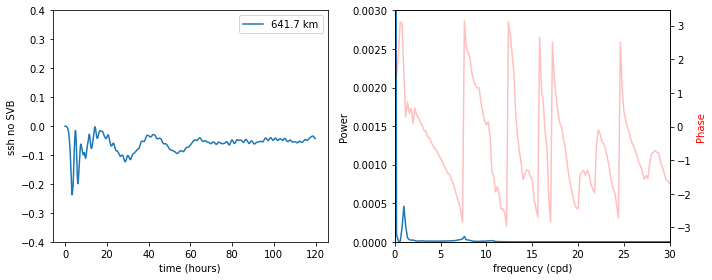

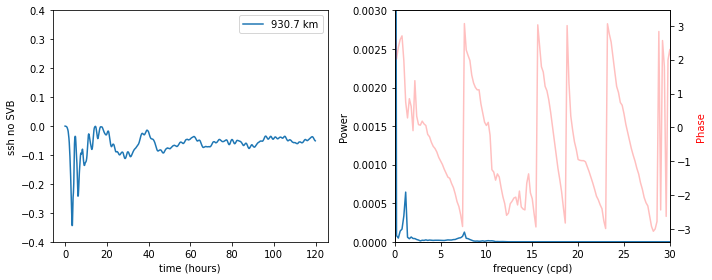

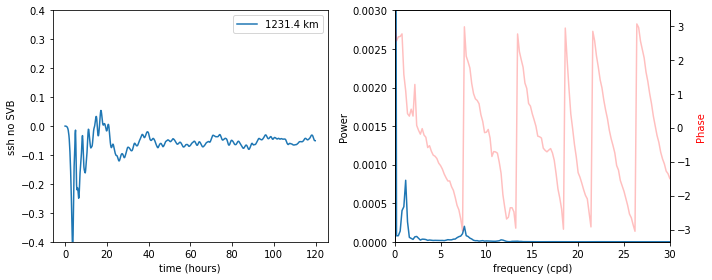

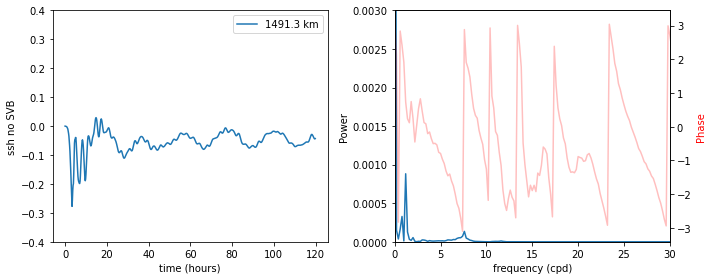

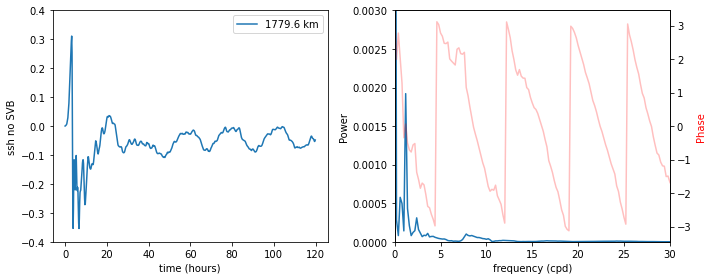

In [6]:
timeseries = (noSVB.curtain_data.data)*100 # in cm
samp_freq = 1/600 # 10 min data
X = SVB.X[:]
indices = [0,50,100,150,200,250,300,350,400,450,500]


# Generate a model signal
t0 = 0
dt = 600
freq = (1./dt)

t = np.linspace( t0, t0+720*dt, 720, endpoint=False )

for ii in indices:
    signal = timeseries[:,ii]

    ## Fourier transform of real valued signal
    signalFFT = np.fft.rfft(signal)

    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    # And now, the graphics -------------------

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(signal), dt)

    plt.figure( figsize=(10, 4) )

    ax1 = plt.subplot( 1, 2, 1 )
    ax1.plot( t/(3600), signal, label='%1.1f km' %X[ii])
    ax1.set_ylabel( 'ssh no SVB' )
    ax1.set_xlabel( 'time (hours)' )
    ax1.legend()

    ax2 = plt.subplot( 1, 2, 2 )
    ax2.plot( fftFreq*(86400), signalPSD )
    ax2.set_ylabel( 'Power' )
    ax2.set_xlabel( 'frequency (cpd)' )

    ax2b = ax2.twinx()
    ax2b.plot( fftFreq*(86400), signalPhase, alpha=0.25, color='r' )
    ax2b.set_ylabel( 'Phase', color='r' )

    ax2.set_xlim(0,30)
    ax2b.set_xlim(0,30)
    ax2.set_ylim(0,0.003)
    ax1.set_ylim(-0.4,0.4)
    
    plt.tight_layout()

    plt.show()

### Spatial structure

In [9]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

ds = open_mdsdataset(outdir, prefix=['eta'])
ds2 = open_mdsdataset(outdir2, prefix=['eta'])

In [10]:
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

nx = len(lon)
ny = len(lat)

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)

# depth with bay
depth = ds['Depth'][:]

In [7]:
filename = 'ssh_spectra_phase_3peaks_febTS_cm.nc'
sshData = xr.open_dataset(filename)

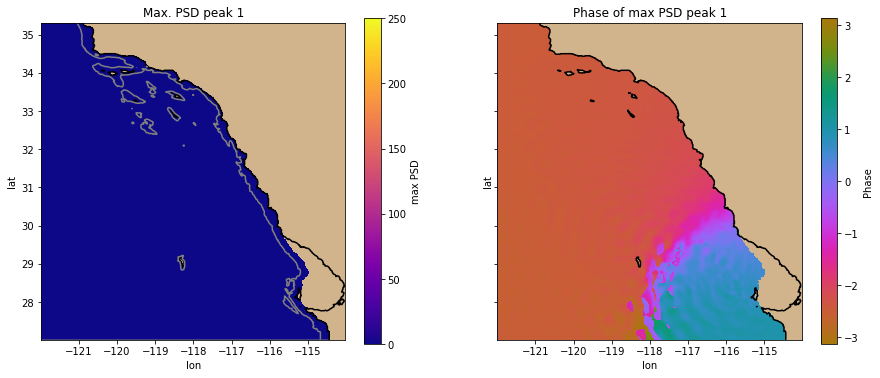

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, sshData.p1_psd, cmap='plasma', vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='max PSD')
levels=np.arange(0,250,5)
cn1 = ax1.contour(lon,lat, sshData.p1_psd, levels, colors='0.5', alpha=0.5)

ax1.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_title('Max. PSD peak 1')
ax1.set_aspect(1)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(lon, lat, sshData.p1_phase, cmap=cmo.cm.phase)
plt.colorbar(pc2, ax=ax2, label='Phase')
ax2.contour(lon,lat,depth,levels=[0], colors=['k'])
ax2.set_xlabel('lon')
ax2.set_ylabel('lat')
ax2.set_title('Phase of max PSD peak 1')
ax2.set_aspect(1)
